# 1.3

## روش اول: با الهام گرفتن از دفترچه کدی که در صورت سوال قرار داد شده است.

### Design Network

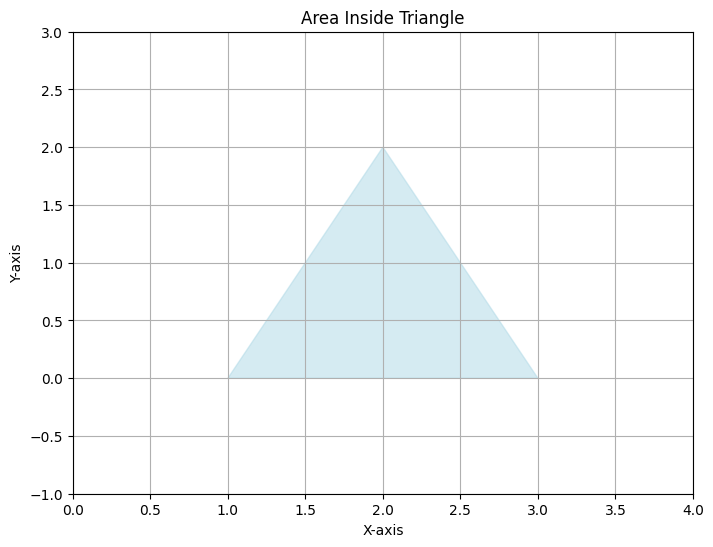

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

class McCulloch_Pitts_neuron():
    def __init__(self, weights, threshold):
        self.weights = weights    # Define weights
        self.threshold = threshold    # Define threshold

    def model(self, x):
        # Define model with threshold
        if self.weights @ x >= self.threshold:
            return 1
        else:
            return 0

def is_point_in_triangle(px, py, A, B, C):
    """Check if point (px, py) is inside the triangle formed by points A, B, C."""
    # Calculate area of the triangle ABC
    area_ABC = 0.5 * abs(A[0] * (B[1] - C[1]) + B[0] * (C[1] - A[1]) + C[0] * (A[1] - B[1]))

    # Calculate area of PAB, PBC and PCA
    area_PAB = 0.5 * abs(px * (A[1] - B[1]) + A[0] * (B[1] - py) + B[0] * (py - A[1]))
    area_PBC = 0.5 * abs(B[0] * (py - C[1]) + px * (C[1] - B[1]) + C[0] * (B[1] - py))
    area_PCA = 0.5 * abs(A[0] * (py - C[1]) + px * (C[1] - A[1]) + C[0] * (A[1] - py))

    # Check if sum of PAB, PBC and PCA is same as ABC
    return area_ABC == area_PAB + area_PBC + area_PCA

def Area(x, y):
    # Define vertices of the triangle
    A = (2, 2)
    B = (3, 0)
    C = (1, 0)

    # Check if point is inside the triangle
    if is_point_in_triangle(x, y, A, B, C):
        return [1]  # Inside triangle
    else:
        return [0]  # Outside triangle

# Step 1: Plotting the Triangle Area
def plot_triangle_area():
    A = np.array([2, 2])
    B = np.array([3, 0])
    C = np.array([1, 0])

    # Create a figure and axis
    plt.figure(figsize=(8, 6))

    # Fill the triangle area
    triangle_x = [A[0], B[0], C[0], A[0]]
    triangle_y = [A[1], B[1], C[1], A[1]]

    plt.fill(triangle_x, triangle_y, color='lightblue', alpha=0.5)

    plt.xlim(0, 4)
    plt.ylim(-1, 3)

    plt.title('Area Inside Triangle')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    plt.grid(True)

    plt.show()

plot_triangle_area()

### Generate 2000 Random Points

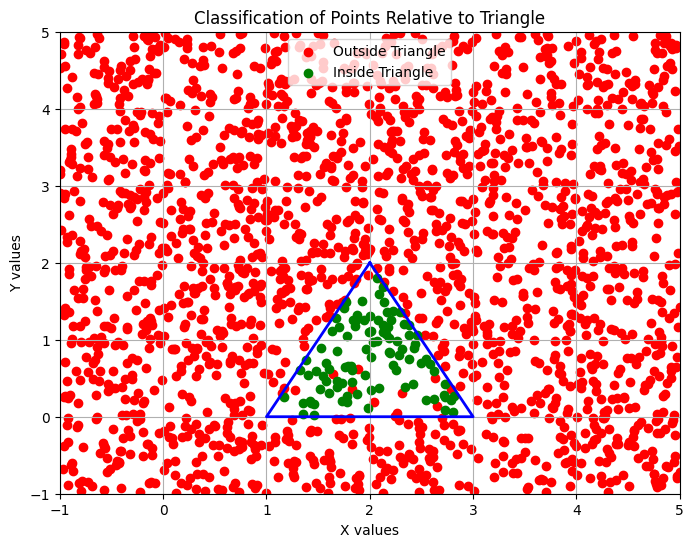

In [2]:
# Step 2: Generate random data points and classify them
num_points = 2000
x_values = np.random.uniform(-1, 5, num_points)
y_values = np.random.uniform(-1, 5, num_points)

# Initialize lists to store classified points
red_points = []   # Outside Triangle
green_points = [] # Inside Triangle

# Classify each point using Area function
for i in range(num_points):
    z5_value = Area(x_values[i], y_values[i])

    if z5_value == [0]:  # Outside Triangle
        red_points.append((x_values[i], y_values[i]))
    else:  # Inside Triangle
        green_points.append((x_values[i], y_values[i]))

# Step 3: Plotting Classified Points
def plot_classified_points(red_points, green_points):
    red_x, red_y = zip(*red_points) if red_points else ([], [])
    green_x, green_y = zip(*green_points) if green_points else ([], [])

    plt.figure(figsize=(8, 6))

    plt.scatter(red_x, red_y, color='red', label='Outside Triangle')
    plt.scatter(green_x, green_y, color='green', label='Inside Triangle')

    plt.title('Classification of Points Relative to Triangle')
    plt.xlabel('X values')
    plt.ylabel('Y values')

    # Plotting triangle edges for visualization
    triangle_x = [2, 3, 1]
    triangle_y = [2, 0, 0]

    plt.plot(triangle_x + [triangle_x[0]], triangle_y + [triangle_y[0]], color='blue', linestyle='-', linewidth=2)

    plt.xlim(-1, 5)
    plt.ylim(-1, 5)

    plt.grid(True)

    plt.legend()

    plt.show()

# Execute plotting functions
plot_classified_points(red_points, green_points)

### Activation Functions Effect

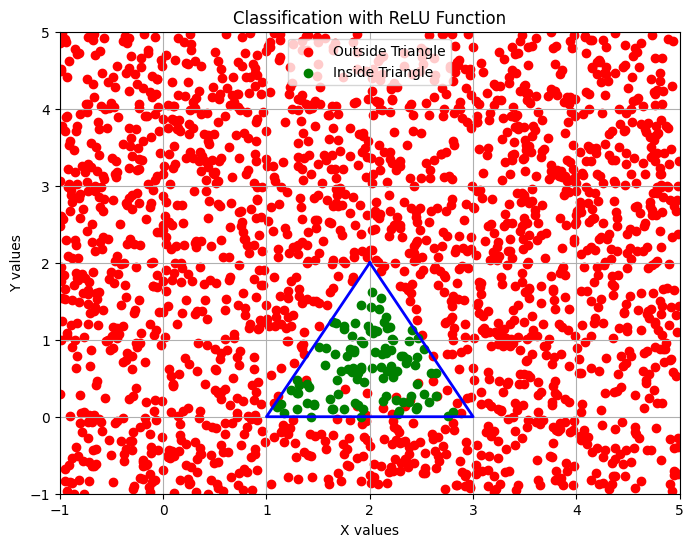

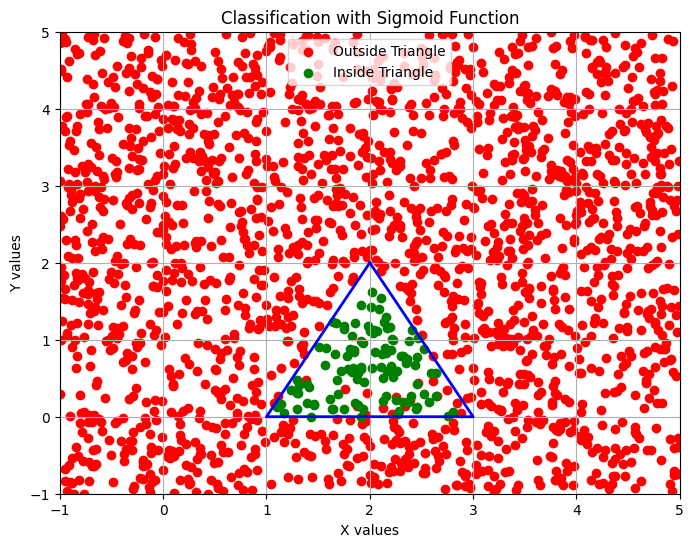

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class McCulloch_Pitts_neuron():
    def __init__(self, weights, threshold, activation_function):
        self.weights = weights
        self.threshold = threshold
        self.activation_function = activation_function

    def model(self, x):
        weighted_sum = np.dot(self.weights, x)
        return self.activation_function(weighted_sum - self.threshold)

def relu_function(x):
    return max(0, x)

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def is_point_in_triangle(px, py, A, B, C):
    area_ABC = 0.5 * abs(A[0] * (B[1] - C[1]) + B[0] * (C[1] - A[1]) + C[0] * (A[1] - B[1]))
    area_PAB = 0.5 * abs(px * (A[1] - B[1]) + A[0] * (B[1] - py) + B[0] * (py - A[1]))
    area_PBC = 0.5 * abs(B[0] * (py - C[1]) + px * (C[1] - B[1]) + C[0] * (B[1] - py))
    area_PCA = 0.5 * abs(A[0] * (py - C[1]) + px * (C[1] - A[1]) + C[0] * (A[1] - py))
    return area_ABC == area_PAB + area_PBC + area_PCA

def Area(x, y):
    A = (2, 2)
    B = (3, 0)
    C = (1, 0)
    if is_point_in_triangle(x, y, A, B, C):
        return 1  # Inside triangle
    else:
        return 0  # Outside triangle

# Initialize the neuron models
relu_neuron = McCulloch_Pitts_neuron(weights=[1, 1], threshold=0.5, activation_function=relu_function)
sigmoid_neuron = McCulloch_Pitts_neuron(weights=[1, 1], threshold=0.5, activation_function=sigmoid_function)


# For ReLU Function
red_points_relu = []
green_points_relu = []
for i in range(num_points):
    point = [x_values[i], y_values[i]]
    z5_value = relu_neuron.model(point)
    if Area(x_values[i], y_values[i]) == 0:
        red_points_relu.append((x_values[i], y_values[i]))
    else:
        green_points_relu.append((x_values[i], y_values[i]))

# For Sigmoid Function
red_points_sigmoid = []
green_points_sigmoid = []
for i in range(num_points):
    point = [x_values[i], y_values[i]]
    z5_value = sigmoid_neuron.model(point)
    if Area(x_values[i], y_values[i]) == 0:
        red_points_sigmoid.append((x_values[i], y_values[i]))
    else:
        green_points_sigmoid.append((x_values[i], y_values[i]))

def plot_classified_points(red_points, green_points, title):
    red_x, red_y = zip(*red_points) if red_points else ([], [])
    green_x, green_y = zip(*green_points) if green_points else ([], [])

    plt.figure(figsize=(8, 6))
    plt.scatter(red_x, red_y, color='red', label='Outside Triangle')
    plt.scatter(green_x, green_y, color='green', label='Inside Triangle')

    plt.title(title)
    plt.xlabel('X values')
    plt.ylabel('Y values')

    triangle_x = [2, 3, 1]
    triangle_y = [2, 0, 0]
    plt.plot(triangle_x + [triangle_x[0]], triangle_y + [triangle_y[0]], color='blue', linestyle='-', linewidth=2)
    plt.xlim(-1, 5)
    plt.ylim(-1, 5)
    plt.grid(True)
    plt.legend()
    plt.show()

plot_classified_points(red_points_relu, green_points_relu, "Classification with ReLU Function")
plot_classified_points(red_points_sigmoid, green_points_sigmoid, "Classification with Sigmoid Function")


## McCulloch-Pitt روش دوم: روش دستی با استفاده از نورون

### Design Network

In [ ]:
# with mccullochpitts neuron
class McCullochPittsNeuron:
    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold

    def predict(self, inputs):
        # Calculate the weighted sum
        weighted_sum = sum(w * i for w, i in zip(self.weights, inputs))
        # Apply threshold
        return 1 if weighted_sum >= self.threshold else 0

def area(x1, y1, x2, y2, x3, y3):
    return abs((x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2)) / 2.0)

def is_point_in_triangle(px, py):
    # Triangle vertices
    A = (2, 2)
    B = (3, 0)
    C = (1, 0)

    # Calculate area of triangle ABC
    area_ABC = area(A[0], A[1], B[0], B[1], C[0], C[1])

    # Calculate area of triangles PAB, PBC and PCA
    area_PAB = area(px, py, A[0], A[1], B[0], B[1])
    area_PBC = area(px, py, B[0], B[1], C[0], C[1])
    area_PCA = area(px, py, C[0], C[1], A[0], A[1])

    # Check if the point is inside the triangle
    return area_ABC == area_PAB + area_PBC + area_PCA

def run_tests():
    # Define weights and thresholds for the McCulloch-Pitts neuron
    weights = [1.0]  # Weight for the point inside condition
    threshold = 0.5  # Threshold for decision making

    test_points = [
        (1.5, 1),   # Inside the triangle
        (3, 0),     # On edge AB
        (2.5, 0.5), # Inside the triangle
        (0, 0),     # Outside the triangle
        (1.5,-1),   # Outside the triangle
        (3,-1),     # Outside the triangle
        (4,-4),     # Outside the triangle
        (0.5,3),    # Outside the triangle
        (2.5,-0.5), # Outside the triangle
        (2.5, 1)    # Inside the triangle
    ]

    for point in test_points:
        px, py = point

        # Check if point is inside triangle using area method
        inside_triangle = is_point_in_triangle(px, py)

        # Use McCulloch-Pitts neuron to decide based on inside_triangle result
        output = McCullochPittsNeuron(weights=weights, threshold=threshold).predict([int(inside_triangle)])

        status = "inside" if output == 1 else "outside"
        print(f"The point ({px}, {py}) is {status} the triangle.")

# Run the tests
run_tests()


The point (1.5, 1) is inside the triangle.
The point (3, 0) is inside the triangle.
The point (2.5, 0.5) is inside the triangle.
The point (0, 0) is outside the triangle.
The point (1.5, -1) is outside the triangle.
The point (3, -1) is outside the triangle.
The point (4, -4) is outside the triangle.
The point (0.5, 3) is outside the triangle.
The point (2.5, -0.5) is outside the triangle.
The point (2.5, 1) is inside the triangle.


### Generate 2000 Points

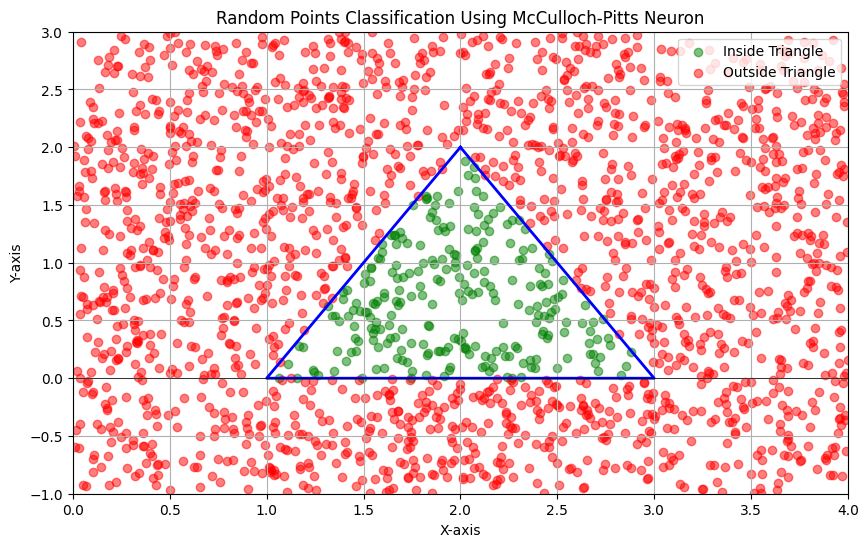

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
class McCullochPittsNeuron:
    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold

    def predict(self, inputs):
        # Calculate the weighted sum
        weighted_sum = sum(w * i for w, i in zip(self.weights, inputs))
        # Apply threshold
        return 1 if weighted_sum >= self.threshold else 0

def area(x1, y1, x2, y2, x3, y3):
    return abs((x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2)) / 2.0)

def is_point_in_triangle(px, py):
    # Triangle vertices
    A = (2, 2)
    B = (3, 0)
    C = (1, 0)

    # Calculate area of triangle ABC
    area_ABC = area(A[0], A[1], B[0], B[1], C[0], C[1])

    # Calculate area of triangles PAB, PBC and PCA
    area_PAB = area(px, py, A[0], A[1], B[0], B[1])
    area_PBC = area(px, py, B[0], B[1], C[0], C[1])
    area_PCA = area(px, py, C[0], C[1], A[0], A[1])

    # Check if the point is inside or on the edge of the triangle
    return np.isclose(area_ABC, area_PAB + area_PBC + area_PCA)


# Generate random points
num_points = 2000
x_random = np.random.uniform(0, 4, num_points)
y_random = np.random.uniform(-1, 3, num_points)

# Define weights and threshold for the McCulloch-Pitts neuron
weights = [1.0]  # Weight for the point inside condition
threshold = 0.5  # Threshold for decision making

# Prepare lists for plotting
inside_points = []
outside_points = []

# Classify each point and store it in the respective list
for x, y in zip(x_random, y_random):
    inside_triangle = is_point_in_triangle(x, y)
    output = McCullochPittsNeuron(weights=weights, threshold=threshold).predict([int(inside_triangle)])

    if output == 1:
        inside_points.append((x, y))
    else:
        outside_points.append((x, y))

# Convert lists to numpy arrays for easier plotting
inside_points = np.array(inside_points)
outside_points = np.array(outside_points)

# Plotting the results
plt.figure(figsize=(10, 6))
if inside_points.size > 0:
    plt.scatter(inside_points[:, 0], inside_points[:, 1], color='green', label='Inside Triangle', alpha=0.5)
if outside_points.size > 0:
    plt.scatter(outside_points[:, 0], outside_points[:, 1], color='red', label='Outside Triangle', alpha=0.5)

# Draw the triangle
triangle_x = [2, 3, 1, 2]  # X coordinates of vertices A(2,2), B(3,0), C(1,0)
triangle_y = [2, 0, 0, 2]  # Y coordinates of vertices A(2,2), B(3,0), C(1,0)
plt.plot(triangle_x, triangle_y, color='blue', linewidth=2)  # Draw triangle edges

# Set plot limits and labels
plt.xlim(0, 4)
plt.ylim(-1, 3)
plt.title('Random Points Classification Using McCulloch-Pitts Neuron')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black', lw=0.5)  # x-axis
plt.axvline(0, color='black', lw=0.5)  # y-axis
plt.grid()
plt.legend()
plt.show()


### Activation Function

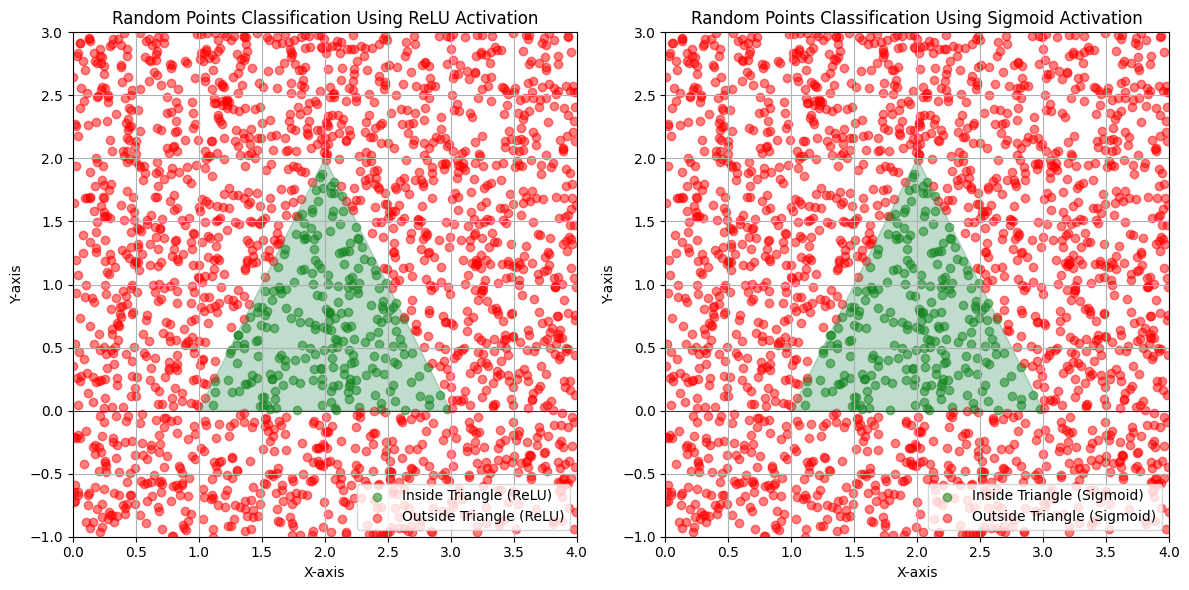

In [ ]:
class McCullochPittsNeuron:
    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold

    def predict(self, inputs):
        # Calculate the weighted sum
        weighted_sum = sum(w * i for w, i in zip(self.weights, inputs))
        return weighted_sum  # Return raw output for activation functions

def relu(x):
    return max(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def area(x1, y1, x2, y2, x3, y3):
    return abs((x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2)) / 2.0)

def is_point_in_triangle(px, py):
    # Triangle vertices
    A = (2, 2)
    B = (3, 0)
    C = (1, 0)

    # Calculate area of triangle ABC
    area_ABC = area(A[0], A[1], B[0], B[1], C[0], C[1])

    # Calculate area of triangles PAB, PBC and PCA
    area_PAB = area(px, py, A[0], A[1], B[0], B[1])
    area_PBC = area(px, py, B[0], B[1], C[0], C[1])
    area_PCA = area(px, py, C[0], C[1], A[0], A[1])

    # Check if the point is inside or on the edge of the triangle
    return np.isclose(area_ABC, area_PAB + area_PBC + area_PCA)

# Generate random points
num_points = 2000
x_random = np.random.uniform(0, 4, num_points)
y_random = np.random.uniform(-1, 3, num_points)

# Define weights for the McCulloch-Pitts neuron
weights = [1.0]  # Weight for the point inside condition

# Prepare lists for plotting for ReLU activation function
inside_points_relu = []
outside_points_relu = []

# Classify each point and store it in the respective list using ReLU
for x, y in zip(x_random, y_random):
    inside_triangle = is_point_in_triangle(x, y)

    # Using ReLU activation function
    output_relu = relu(McCullochPittsNeuron(weights=weights, threshold=0).predict([int(inside_triangle)]))

    if output_relu > 0:
        inside_points_relu.append((x, y))
    else:
        outside_points_relu.append((x, y))

# Prepare lists for plotting for Sigmoid activation function
inside_points_sigmoid = []
outside_points_sigmoid = []

# Classify each point and store it in the respective list using Sigmoid
for x, y in zip(x_random, y_random):
    inside_triangle = is_point_in_triangle(x, y)

    # Using Sigmoid activation function
    output_sigmoid = sigmoid(McCullochPittsNeuron(weights=weights, threshold=0).predict([int(inside_triangle)]))

    if output_sigmoid > 0.5:  # Threshold for sigmoid output
        inside_points_sigmoid.append((x, y))
    else:
        outside_points_sigmoid.append((x, y))

# Convert lists to numpy arrays for easier plotting
inside_points_relu = np.array(inside_points_relu)
outside_points_relu = np.array(outside_points_relu)
inside_points_sigmoid = np.array(inside_points_sigmoid)
outside_points_sigmoid = np.array(outside_points_sigmoid)

# Plotting the results for ReLU activation function
plt.figure(figsize=(12, 6))

# ReLU Plot
plt.subplot(1, 2, 1)
if inside_points_relu.size > 0:
    plt.scatter(inside_points_relu[:, 0], inside_points_relu[:, 1], color='green', label='Inside Triangle (ReLU)', alpha=0.5)
if outside_points_relu.size > 0:
    plt.scatter(outside_points_relu[:, 0], outside_points_relu[:, 1], color='red', label='Outside Triangle (ReLU)', alpha=0.5)

# Draw the triangle for ReLU plot
triangle_x = [2, 3, 1]
triangle_y = [2, 0, 0]
plt.fill(triangle_x + [triangle_x[0]], triangle_y + [triangle_y[0]], color='seagreen', alpha=0.3)

plt.xlim(0, 4)
plt.ylim(-1, 3)
plt.title('Random Points Classification Using ReLU Activation')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid()
plt.legend()

# Sigmoid Plot
plt.subplot(1, 2, 2)
if inside_points_sigmoid.size > 0:
    plt.scatter(inside_points_sigmoid[:, 0], inside_points_sigmoid[:, 1], color='green', label='Inside Triangle (Sigmoid)', alpha=0.5)
if outside_points_sigmoid.size > 0:
    plt.scatter(outside_points_sigmoid[:, 0], outside_points_sigmoid[:, 1], color='red', label='Outside Triangle (Sigmoid)', alpha=0.5)

# Draw the triangle for Sigmoid plot
plt.fill(triangle_x + [triangle_x[0]], triangle_y + [triangle_y[0]], color='seagreen', alpha=0.3)

plt.xlim(0, 4)
plt.ylim(-1, 3)
plt.title('Random Points Classification Using Sigmoid Activation')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid()
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


# 2

## Import modules

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, regularizers, Optimizer
from sklearn.metrics import classification_report
from tensorflow.keras.losses import CategoricalCrossentropy

##  2.1. Load Dataset

In [8]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1L-etozwFKtZxlouLZ7zNMXLEkYIICpN7

Downloading...
From: https://drive.google.com/uc?id=1L-etozwFKtZxlouLZ7zNMXLEkYIICpN7
To: /content/teleCust1000t.csv
100% 37.0k/37.0k [00:00<00:00, 51.7MB/s]


In [9]:
file_path = '/content/teleCust1000t.csv'
df = pd.read_csv(file_path)

feature_names = df.columns.tolist()
print("Feature names:", feature_names)

#sample size

sample_size = len(df)
print("Sample size:", sample_size)

Feature names: ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']
Sample size: 1000


In [ ]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [10]:
# Extract unique class names
classes = df['custcat'].unique()
print("Classes in 'custcat':", classes)

Classes in 'custcat': [1 4 3 2]


## 2.2. correlation and heatmap

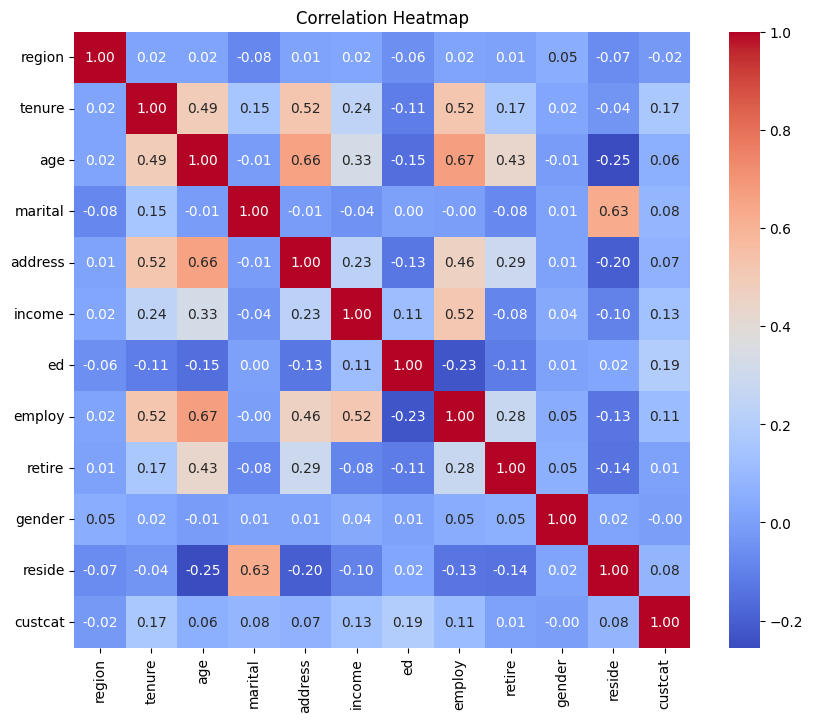

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


Top features correlated with custcat: ['ed', 'tenure']


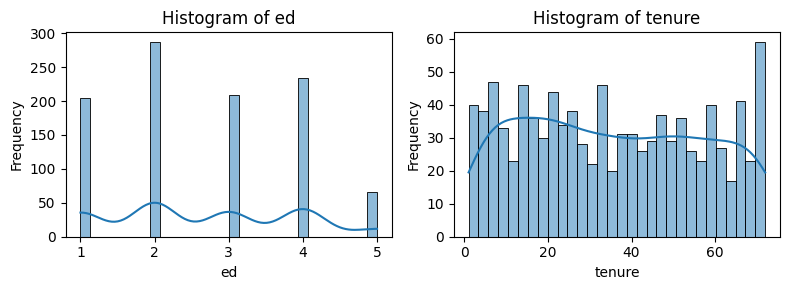

In [ ]:
target_variable = 'custcat'

# Find features with highest correlation to the target variable
correlations = correlation_matrix[target_variable].drop(target_variable)
top_features = correlations.abs().nlargest(2).index.tolist()

print(f"Top features correlated with {target_variable}: {top_features}")

# Draw histograms for the two features
plt.figure(figsize=(8, 3))

for i, feature in enumerate(top_features):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 2.3. MinMaxScaler & Data split

In [ ]:
# Separate features and target variable
X = df.drop(columns=[target_variable])  # Features
y = df[target_variable]                   # Target variable

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# One-hot encode the target variable for multi-class classification (4 classes)
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))  # Reshape if y is a Series

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.4, random_state=43)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=43)

# Display the sizes of each dataset
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 600
Validation set size: 200
Test set size: 200


## 2.4.

### neuron number

32 neurons

In [ ]:
# Model 1: MLP with one hidden layer
model1 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(32, activation='relu'),        # Hidden layer with 10 neurons
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 1 with a smaller learning rate
model1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 1 with early stopping
history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Model 2: MLP with two hidden layers
model2 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(32, activation='relu'),        # First hidden layer with 10 neurons
    layers.Dense(16, activation='relu'),        # Second hidden layer with 10 neurons
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 2 with a smaller learning rate
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 2 with early stopping
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Evaluate both models on the test set
test_loss1, test_accuracy1 = model1.evaluate(X_test, y_test)
test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test)

print(f"Model 1 - Test Loss: {test_loss1}, Test Accuracy: {test_accuracy1}")
print(f"Model 2 - Test Loss: {test_loss2}, Test Accuracy: {test_accuracy2}")

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.2815 - loss: 1.3956 - val_accuracy: 0.3100 - val_loss: 1.3805
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3035 - loss: 1.3772 - val_accuracy: 0.3200 - val_loss: 1.3693
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3689 - loss: 1.3540 - val_accuracy: 0.3450 - val_loss: 1.3546
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3392 - loss: 1.3445 - val_accuracy: 0.3400 - val_loss: 1.3462
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3459 - loss: 1.3465 - val_accuracy: 0.3750 - val_loss: 1.3403
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3602 - loss: 1.3299 - val_accuracy: 0.3800 - val_loss: 1.3260
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4011 - loss: 1.3124 - val_accuracy: 0.3800 - val_loss: 1.3161
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3926 - loss: 1.3142 - val_accuracy: 0.3850 - 

32, 32 neurons

In [ ]:
# Model 1: MLP with one hidden layer
model1 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(32, activation='relu'),        # Hidden layer
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 1
model1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 1
history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Model 2: MLP with two hidden layers
model2 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(128, activation='relu'),        # First hidden layer
    layers.Dense(64, activation='relu'),        # Second hidden layer
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 2 with a smaller learning rate
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 2 with early stopping
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.2401 - loss: 1.4093 - val_accuracy: 0.2600 - val_loss: 1.4013
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2843 - loss: 1.3745 - val_accuracy: 0.2900 - val_loss: 1.3846
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3299 - loss: 1.3637 - val_accuracy: 0.3200 - val_loss: 1.3673
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3363 - loss: 1.3486 - val_accuracy: 0.3550 - val_loss: 1.3499
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3857 - loss: 1.3340 - val_accuracy: 0.3750 - val_loss: 1.3377
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4050 - loss: 1.3132 - val_accuracy: 0.3950 - val_loss: 1.3247
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4288 - loss: 1.3066 - val_accuracy: 0.3950 - val_loss: 1.3134
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3947 - loss: 1.2994 - val_accuracy: 0.3950 - 

64 neurons

In [ ]:
# Model 1: MLP with one hidden layer
model1 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 1
model1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 1 with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Model 2: MLP with two hidden layers
model2 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Compile Model 2
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 2
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Evaluate both models on the test set
test_loss1, test_accuracy1 = model1.evaluate(X_test, y_test)
test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test)

print(f"Model 1 - Test Loss: {test_loss1}, Test Accuracy: {test_accuracy1}")
print(f"Model 2 - Test Loss: {test_loss2}, Test Accuracy: {test_accuracy2}")


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.2508 - loss: 1.3886 - val_accuracy: 0.2850 - val_loss: 1.3773
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3215 - loss: 1.3604 - val_accuracy: 0.3450 - val_loss: 1.3526
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3612 - loss: 1.3409 - val_accuracy: 0.3650 - val_loss: 1.3404
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3809 - loss: 1.3331 - val_accuracy: 0.3700 - val_loss: 1.3297
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4045 - loss: 1.3090 - val_accuracy: 0.3950 - val_loss: 1.3182
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4266 - loss: 1.2895 - val_accuracy: 0.3600 - val_loss: 1.3069
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4060 - loss: 1.2904 - val_accuracy: 0.3950 - val_loss: 1.3021
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3898 - loss: 1.3042 - val_accuracy: 0.3900 - 

### Batch Normalization


model1: 32 N
model2: 32,16 N

In [ ]:
# Model 1: MLP with one hidden layer
model1 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(32, activation='relu'),        # Hidden layer
    layers.BatchNormalization(),
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 1
model1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 1
history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Model 2: MLP with two hidden layers
model2 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(32, activation='relu'),        # First hidden layer
    layers.BatchNormalization(),
    layers.Dense(16, activation='relu'),        # Second hidden layer
    layers.BatchNormalization(),
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 2 with a smaller learning rate
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 2 with early stopping
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.2672 - loss: 1.6284 - val_accuracy: 0.3050 - val_loss: 1.4074
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3950 - loss: 1.2736 - val_accuracy: 0.3450 - val_loss: 1.3841
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4146 - loss: 1.2519 - val_accuracy: 0.3800 - val_loss: 1.3813
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4609 - loss: 1.2172 - val_accuracy: 0.3750 - val_loss: 1.3704
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4685 - loss: 1.2011 - val_accuracy: 0.4000 - val_loss: 1.3326
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4406 - loss: 1.2501 - val_accuracy: 0.3600 - val_loss: 1.3388
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4510 - loss: 1.2005 - val_accuracy: 0.3800 - val_loss: 1.3185
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4400 - loss: 1.1856 - val_accuracy: 0.3850 -

model1: 64 N  model2: 64, 64 N

In [ ]:
# Model 1: MLP with one hidden layer
model1 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 1
model1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 1

history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Model 2: MLP with two hidden layers
model2 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(4, activation='softmax')
])

# Compile Model 2
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 2
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)



Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.2446 - loss: 1.8622 - val_accuracy: 0.2450 - val_loss: 1.4184
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2639 - loss: 1.8271 - val_accuracy: 0.2600 - val_loss: 1.4133
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2446 - loss: 1.7512 - val_accuracy: 0.2550 - val_loss: 1.4090
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2495 - loss: 1.6871 - val_accuracy: 0.2550 - val_loss: 1.4053
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2580 - loss: 1.7076 - val_accuracy: 0.2400 - val_loss: 1.4022
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2438 - loss: 1.6433 - val_accuracy: 0.2600 - val_loss: 1.3994
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2340 - loss: 1.6605 - val_accuracy: 0.2650 - val_loss: 1.3967
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2681 - loss: 1.5481 - val_accuracy: 0.2800 - 

model1: 32 neurons
model2: 128,64 neurons

In [ ]:
# Model 1: MLP with one hidden layer
model1 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(32, activation='relu'),        # Hidden layer
    layers.BatchNormalization(),
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 1
model1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 1
history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Model 2: MLP with two hidden layers
model2 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(128, activation='relu'),        # First hidden layer
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),        # Second hidden layer
    layers.BatchNormalization(),
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 2 with a smaller learning rate
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 2 with early stopping
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.2877 - loss: 1.6268 - val_accuracy: 0.3200 - val_loss: 1.3926
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3985 - loss: 1.2856 - val_accuracy: 0.3200 - val_loss: 1.3711
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4240 - loss: 1.2645 - val_accuracy: 0.3300 - val_loss: 1.3700
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4660 - loss: 1.2553 - val_accuracy: 0.2900 - val_loss: 1.3499
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4178 - loss: 1.2248 - val_accuracy: 0.3050 - val_loss: 1.3345
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4301 - loss: 1.2476 - val_accuracy: 0.3150 - val_loss: 1.3263
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3888 - loss: 1.2511 - val_accuracy: 0.3250 - val_loss: 1.2948
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4553 - loss: 1.1728 - val_accuracy: 0.3350 - 

### Dropout

first try

In [ ]:
# Model 1: MLP with one hidden layer and Dropout
model1 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),        # Hidden layer with 32 neurons
    layers.Dropout(0.5),                        # Dropout layer to prevent overfitting
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 1
model1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 1

history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Model 2: MLP with two hidden layers and Dropout
model2 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),                        # Dropout layer after first hidden layer
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),                        # Dropout layer after second hidden layer
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 2
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 2
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.2193 - loss: 1.4583 - val_accuracy: 0.2550 - val_loss: 1.3979
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2912 - loss: 1.4164 - val_accuracy: 0.2650 - val_loss: 1.3825
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2847 - loss: 1.3961 - val_accuracy: 0.2650 - val_loss: 1.3722
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3108 - loss: 1.3718 - val_accuracy: 0.2750 - val_loss: 1.3615
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3361 - loss: 1.3542 - val_accuracy: 0.2800 - val_loss: 1.3497
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3199 - loss: 1.3369 - val_accuracy: 0.2900 - val_loss: 1.3470
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3608 - loss: 1.3404 - val_accuracy: 0.3200 - val_loss: 1.3391
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2971 - loss: 1.3685 - val_accuracy: 0.3250 - 

second try

In [ ]:
# Model 1: MLP with one hidden layer and Dropout
model1 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),        # Hidden layer with 32 neurons
    layers.Dropout(0.2),                        # Dropout layer to prevent overfitting
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 1
model1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 1

history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Model 2: MLP with two hidden layers and Dropout
model2 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),                        # Dropout layer after first hidden layer
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),                        # Dropout layer after second hidden layer
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 2
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 2
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.2639 - loss: 1.4276 - val_accuracy: 0.3200 - val_loss: 1.3803
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2712 - loss: 1.3855 - val_accuracy: 0.3400 - val_loss: 1.3672
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3235 - loss: 1.3730 - val_accuracy: 0.3550 - val_loss: 1.3546
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3860 - loss: 1.3287 - val_accuracy: 0.4050 - val_loss: 1.3367
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3447 - loss: 1.3346 - val_accuracy: 0.4100 - val_loss: 1.3285
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3618 - loss: 1.3135 - val_accuracy: 0.3800 - val_loss: 1.3284
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3650 - loss: 1.3238 - val_accuracy: 0.3800 - val_loss: 1.3132
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3709 - loss: 1.3122 - val_accuracy: 0.4100 - 

### L2-Regularization

In [ ]:
# Model 1: MLP with one hidden layer and Dropout
model1 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu',        # Hidden layer with 32 neurons
    kernel_regularizer=regularizers.l2(0.0001)),  # L2 Regularization
    layers.Dropout(0.5),                        # Dropout layer to prevent overfitting
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 1
model1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 1

history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Model 2: MLP with two hidden layers and Dropout
model2 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu',
    kernel_regularizer=regularizers.l2(0.0001)),  # L2 Regularization
    layers.Dropout(0.5),                        # Dropout layer after first hidden layer
    layers.Dense(16, activation='relu',
    kernel_regularizer=regularizers.l2(0.0001)),  # L2 Regularization
    layers.Dropout(0.5),                        # Dropout layer after second hidden layer
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 2
model2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 2
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Evaluate both models on the test set
test_loss1, test_accuracy1 = model1.evaluate(X_test, y_test)
test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test)

print(f"Model 1 - Test Loss: {test_loss1}, Test Accuracy: {test_accuracy1}")
print(f"Model 2 - Test Loss: {test_loss2}, Test Accuracy: {test_accuracy2}")

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2141 - loss: 1.4549 - val_accuracy: 0.2400 - val_loss: 1.4133
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2667 - loss: 1.4154 - val_accuracy: 0.2800 - val_loss: 1.3961
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3014 - loss: 1.3853 - val_accuracy: 0.2800 - val_loss: 1.3807
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3359 - loss: 1.3591 - val_accuracy: 0.3150 - val_loss: 1.3688
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3268 - loss: 1.3639 - val_accuracy: 0.3150 - val_loss: 1.3608
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3559 - loss: 1.3406 - val_accuracy: 0.3400 - val_loss: 1.3490
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3846 - loss: 1.3289 - val_accuracy: 0.3550 - val_loss: 1.3409
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4028 - loss: 1.3156 - val_accuracy: 0.3550 - 

### Optimizers

**Adam**

In [ ]:
# Model 1: MLP with one hidden layer and Dropout
best_model1= keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu',        # Hidden layer with 32 neurons
    kernel_regularizer=regularizers.l2(0.0001)),  # L2 Regularization
    layers.Dropout(0.5),                        # Dropout layer to prevent overfitting
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 1
best_model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 1

history1 = best_model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Model 2: MLP with two hidden layers and Dropout
best_model2 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu',
    kernel_regularizer=regularizers.l2(0.0001)),  # L2 Regularization
    layers.Dropout(0.5),                        # Dropout layer after first hidden layer
    layers.Dense(16, activation='relu',
    kernel_regularizer=regularizers.l2(0.0001)),  # L2 Regularization
    layers.Dropout(0.5),                        # Dropout layer after second hidden layer
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 2
best_model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 2
history2 = best_model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.2397 - loss: 1.4701 - val_accuracy: 0.2900 - val_loss: 1.4120
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2708 - loss: 1.4444 - val_accuracy: 0.2900 - val_loss: 1.3983
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2667 - loss: 1.4241 - val_accuracy: 0.3000 - val_loss: 1.3890
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2247 - loss: 1.4439 - val_accuracy: 0.2850 - val_loss: 1.3827
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2678 - loss: 1.4135 - val_accuracy: 0.2850 - val_loss: 1.3750
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2865 - loss: 1.3796 - val_accuracy: 0.2800 - val_loss: 1.3684
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2866 - loss: 1.3745 - val_accuracy: 0.2800 - val_loss: 1.3615
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2980 - loss: 1.3811 - val_accuracy: 0.2850 -

**RMSprop**

In [ ]:
# Model 1: MLP with one hidden layer and Dropout
model1 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu',        # Hidden layer with 32 neurons
    kernel_regularizer=regularizers.l2(0.0001)),  # L2 Regularization
    layers.Dropout(0.5),                        # Dropout layer to prevent overfitting
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 1
model1.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 1

history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Model 2: MLP with two hidden layers and Dropout
model2 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu',
    kernel_regularizer=regularizers.l2(0.0001)),  # L2 Regularization
    layers.Dropout(0.5),                        # Dropout layer after first hidden layer
    layers.Dense(16, activation='relu',
    kernel_regularizer=regularizers.l2(0.0001)),  # L2 Regularization
    layers.Dropout(0.5),                        # Dropout layer after second hidden layer
    layers.Dense(4, activation='softmax')       # Output layer for multi-class classification (4 classes)
])

# Compile Model 2
model2.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 2
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2946 - loss: 1.4202 - val_accuracy: 0.2550 - val_loss: 1.3956
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2949 - loss: 1.4104 - val_accuracy: 0.2950 - val_loss: 1.3877
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2951 - loss: 1.3830 - val_accuracy: 0.2950 - val_loss: 1.3814
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3158 - loss: 1.3935 - val_accuracy: 0.3100 - val_loss: 1.3750
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3111 - loss: 1.3860 - val_accuracy: 0.3250 - val_loss: 1.3707
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3259 - loss: 1.3814 - val_accuracy: 0.3300 - val_loss: 1.3652
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3336 - loss: 1.3685 - val_accuracy: 0.3350 - val_loss: 1.3595
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3207 - loss: 1.3702 - val_accuracy: 0.3200 - 

## 2.5

In [ ]:
# Evaluate both models on the test set
test_loss1, test_accuracy1 = best_model1.evaluate(X_test, y_test)
test_loss2, test_accuracy2 = best_model2.evaluate(X_test, y_test)

print(f"Model 1 - Test Loss: {test_loss1:.4f}, Test Accuracy: {test_accuracy1:.4f}")
print(f"Model 2 - Test Loss: {test_loss2:.4f}, Test Accuracy: {test_accuracy2:.4f}")

# Randomly select 10 samples from the test data
num_samples = 10
random_indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
X_sample = X_test[random_indices]
y_sample = y_test[random_indices]

# Get predictions from both models
predictions_model1 = best_model1.predict(X_sample)
predictions_model2 = best_model2.predict(X_sample)

# Convert predictions from one-hot encoding to class labels
predicted_classes_model1 = np.argmax(predictions_model1, axis=1)
predicted_classes_model2 = np.argmax(predictions_model2, axis=1)
actual_classes = np.argmax(y_sample, axis=1)

# Report outputs
print("\nSample Predictions vs Actual Values:")
print(f"{'Sample':<8} {'Model 1 Prediction':<20} {'Model 2 Prediction':<20} {'Actual Value':<15}")
for i in range(num_samples):
    print(f"{i + 1:<8} {predicted_classes_model1[i]:<20} {predicted_classes_model2[i]:<20} {actual_classes[i]:<15}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3883 - loss: 1.2949 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4180 - loss: 1.3025 
Model 1 - Test Loss: 1.2892, Test Accuracy: 0.3950
Model 2 - Test Loss: 1.2920, Test Accuracy: 0.4250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step

Sample Predictions vs Actual Values:
Sample   Model 1 Prediction   Model 2 Prediction   Actual Value   
1        3                    3                    3              
2        2                    2                    2              
3        3                    3                    2              
4        0                    0                    0              
5        0                    3                    2              
6        3                    3                    3              
7        3                    3                    1              
8        3                    3                    3              
9        1                    1    

## 2.6

### Simple Averaging

In [ ]:
# Get predictions from both models on the test set
predictions_model1 = best_model1.predict(X_test)
predictions_model2 = best_model2.predict(X_test)

# Average the predictions (for softmax outputs)
combined_predictions = (predictions_model1 + predictions_model2) / 2

# Convert combined predictions from probabilities to class labels
predicted_classes_combined = np.argmax(combined_predictions, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Calculate accuracy of combined predictions
combined_accuracy = np.mean(predicted_classes_combined == actual_classes)

# Evaluate combined model results
print("\nCombined Model Results:")
print(f"Combined Test Accuracy: {combined_accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(actual_classes, predicted_classes_combined))

# loss
loss_fn = CategoricalCrossentropy()
combined_loss = loss_fn(y_test, combined_predictions).numpy()

print(f"Combined Test Loss: {combined_loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Combined Model Results:
Combined Test Accuracy: 0.4100

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.57      0.46        46
           1       0.38      0.11      0.18        44
           2       0.37      0.42      0.39        52
           3       0.49      0.50      0.50        58

    accuracy                           0.41       200
   macro avg       0.41      0.40      0.38       200
weighted avg       0.41      0.41      0.39       200

Combined Test Loss: 1.2841


### Majority Voting

In [ ]:
# Get predictions
predictions_model1 = best_model1.predict(X_test)
predictions_model2 = best_model2.predict(X_test)

# Convert predictions from probabilities to class labels
predicted_classes_model1 = np.argmax(predictions_model1, axis=1)
predicted_classes_model2 = np.argmax(predictions_model2, axis=1)

# majority voting
combined_predictions = []
for i in range(len(predicted_classes_model1)):
    # Count votes for each class
    votes = [predicted_classes_model1[i], predicted_classes_model2[i]]
    # Get the most common class (majority vote)
    combined_class = np.bincount(votes).argmax()
    combined_predictions.append(combined_class)

# Convert combined predictions to a NumPy array
combined_predictions = np.array(combined_predictions)

# accuracy
actual_classes = np.argmax(y_test, axis=1)
combined_accuracy = np.mean(combined_predictions == actual_classes)

# combined results
print("\nCombined Model Results using Majority Voting:")
print(f"Combined Test Accuracy: {combined_accuracy:.4f}")

# classification report
print("\nClassification Report:")
print(classification_report(actual_classes, combined_predictions))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Combined Model Results using Majority Voting:
Combined Test Accuracy: 0.4050

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.57      0.43        46
           1       0.36      0.11      0.17        44
           2       0.38      0.44      0.41        52
           3       0.54      0.47      0.50        58

    accuracy                           0.41       200
   macro avg       0.41      0.40      0.38       200
weighted avg       0.41      0.41      0.39       200



#3

### 3.1

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 14.8MB/s]
Archive:  PersianData.zip
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


In [ ]:
from PIL import Image, ImageDraw
import random

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return binary_representation

In [ ]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 500

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()


Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


### 3.2 Hamming Network

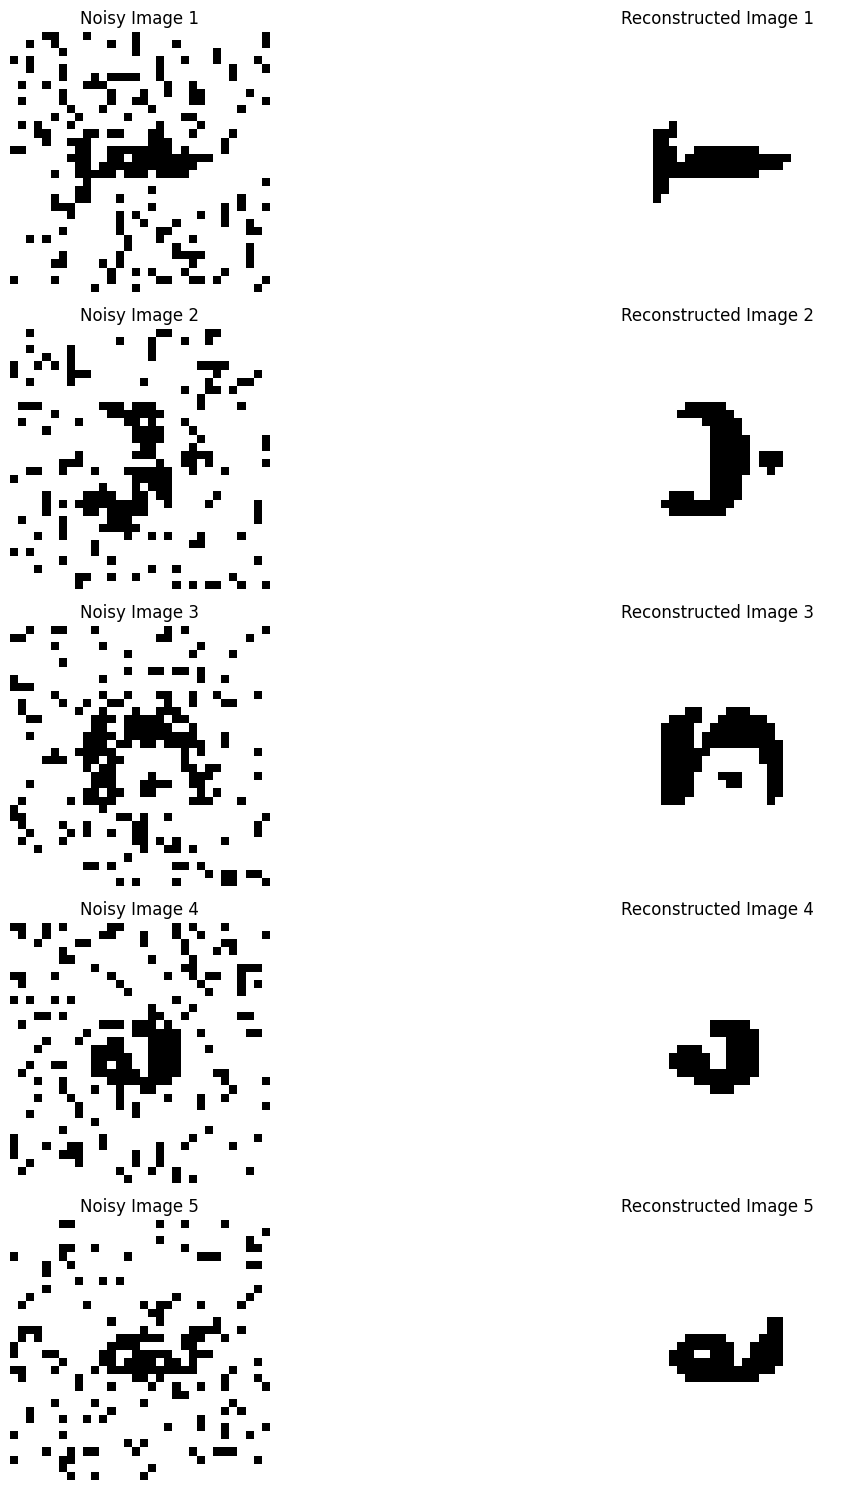

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

class HammingNetwork:
    def __init__(self):
        self.patterns = []

    def train(self, patterns):
        # Store patterns in the list
        self.patterns = patterns

    def reconstruct(self, input_pattern):
        # Find the closest pattern using Hamming distance
        distances = [np.sum(input_pattern != pattern) for pattern in self.patterns]
        closest_index = np.argmin(distances)  # Get index of the closest pattern
        return self.patterns[closest_index]  # Return the closest pattern

def convertImageToBinary(path):
    """Convert an image to a binary representation based on pixel intensity."""
    image = Image.open(path).convert('L')  # Convert to grayscale
    image = image.resize((32, 32))  # Resize to 32x32
    width, height = image.size
    pix = image.load()

    binary_representation = []

    for i in range(width):
        for j in range(height):
            total_intensity = pix[i, j]
            # Use -1 for black (intensity < 127) and 1 for white (intensity >= 127)
            binary_representation.append(-1 if total_intensity < 127 else 1)

    return np.array(binary_representation)

def display_all_images(noisy_images, reconstructed_images):
    """Display all noisy images and their reconstructed versions side by side."""
    num_images = len(noisy_images)
    plt.figure(figsize=(15, num_images * 3))

    for i in range(num_images):
        plt.subplot(num_images, 2, i * 2 + 1)
        plt.imshow(noisy_images[i].reshape(32, 32), cmap='gray')
        plt.title(f'Noisy Image {i + 1}')
        plt.axis('off')

        plt.subplot(num_images, 2, i * 2 + 2)
        plt.imshow(reconstructed_images[i].reshape(32, 32), cmap='gray')
        plt.title(f'Reconstructed Image {i + 1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load clean and noisy images (update with your paths)
clean_image_paths = [
    "/content/1.jpg",
    "/content/2.jpg",
    "/content/3.jpg",
    "/content/4.jpg",
    "/content/5.jpg"
]

noisy_image_paths = [
    "/content/noisy1.jpg",
    "/content/noisy2.jpg",
    "/content/noisy3.jpg",
    "/content/noisy4.jpg",
    "/content/noisy5.jpg"
]

# Convert images to binary representation
clean_images_binary = [convertImageToBinary(path) for path in clean_image_paths]
noisy_images_binary = [convertImageToBinary(path) for path in noisy_image_paths]

# Initialize and train the Hamming network
hamming_network = HammingNetwork()
hamming_network.train(clean_images_binary)

# Reconstruct noisy images
reconstructed_images = [hamming_network.reconstruct(noisy) for noisy in noisy_images_binary]

# Display results
display_all_images(
    noisy_images_binary,
    reconstructed_images
)


## 3.3 Misssing Point

Image with missing points for /content/1.jpg generated and saved as /content/missing_points1.jpg


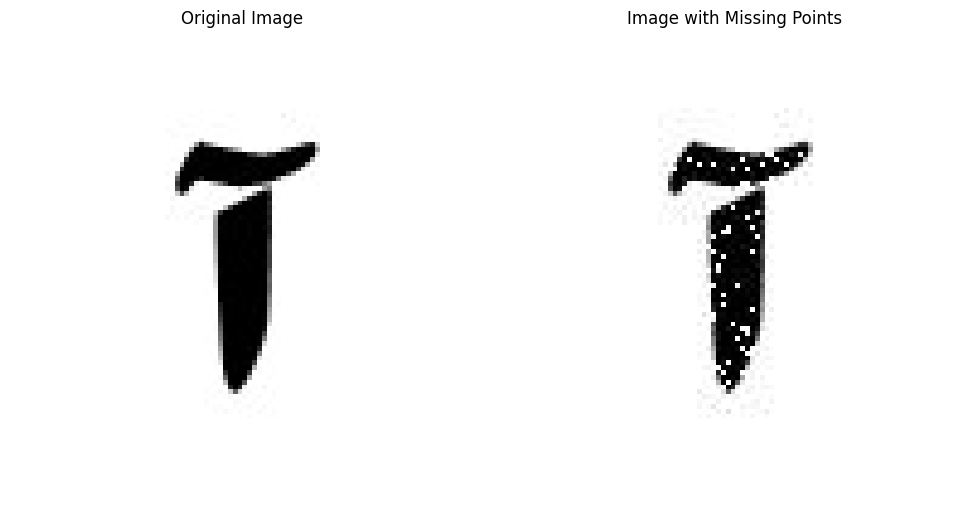

In [ ]:
from PIL import Image, ImageDraw
import random
import matplotlib.pyplot as plt

def generateImagesWithMissingPoints():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    # Define the percentage of pixels to be removed
    missing_percentage = 0.1  # 10% of the pixels will be blanked out

    # Generate images and return the path of one example
    for i, image_path in enumerate(image_paths, start=1):
        output_path = f"/content/missing_points{i}.jpg"
        createImageWithMissingPoints(image_path, output_path, missing_percentage)
        print(f"Image with missing points for {image_path} generated and saved as {output_path}")

        # Return the first generated image and its corresponding original image
        if i == 1:  # Change this condition to select a different example if desired
            return image_path, output_path

def createImageWithMissingPoints(input_path, output_path, missing_percentage):
    """
    Create an image with random missing points and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the modified image.
        missing_percentage (float): The percentage of pixels to be set to white.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width, height = image.size

    # Calculate the total number of pixels to remove
    total_pixels = width * height
    num_missing_pixels = int(total_pixels * missing_percentage)

    # Loop through and set random pixels to white (or any color you choose)
    for _ in range(num_missing_pixels):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)

        # Set the pixel color to white (to simulate a missing point)
        draw.point((x, y), fill=(255, 255, 255))  # White color

    # Save the modified image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

def display_image_pair(original_path, generated_path):
    """Display the original and modified images side by side."""

    original_image = Image.open(original_path)
    generated_image = Image.open(generated_path)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(generated_image)
    plt.title('Image with Missing Points')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Generate images with missing points and get one example
original_image_path, generated_image_path = generateImagesWithMissingPoints()

# Display the original and modified images side by side
display_image_pair(original_image_path, generated_image_path)


### Reconstruct Images With Missing Points

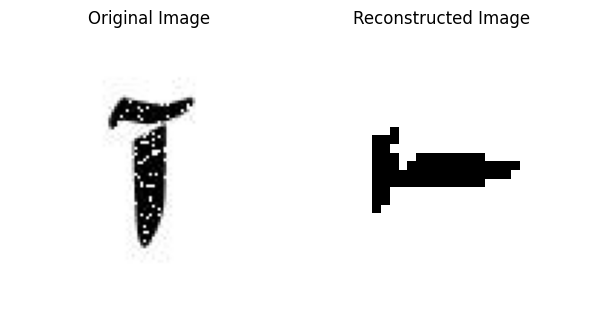

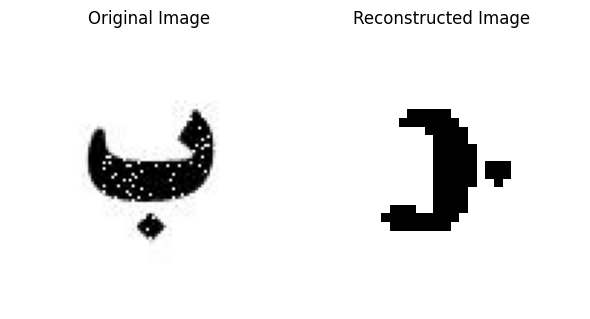

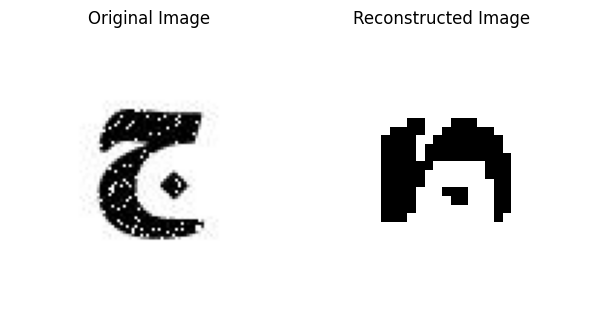

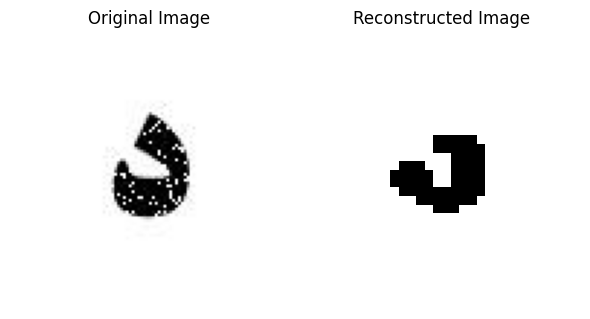

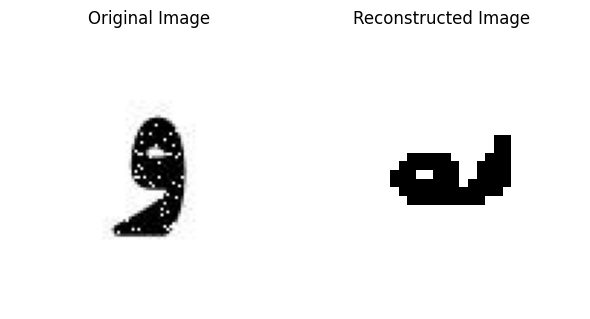

In [ ]:
from PIL import Image, ImageDraw
import random
import numpy as np
import matplotlib.pyplot as plt

def display_image_pair(original_path, reconstructed_image):
    """Display the original and reconstructed images side by side."""

    original_image = Image.open(original_path)

    plt.figure(figsize=(6, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image.reshape(32, 32), cmap='gray')
    plt.title('Reconstructed Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Paths to original images and images with missing points
Missing_point_image_paths = [
    "/content/missing_points1.jpg",
    "/content/missing_points2.jpg",
    "/content/missing_points3.jpg",
    "/content/missing_points4.jpg",
    "/content/missing_points5.jpg"
]

# Generate images with missing points (if not already generated)
missing_percentage = 0.1  # Set to remove x% of pixels
generated_images_paths = []

for i, path in enumerate(original_image_paths):
    output_path = f"/content/missing_points{i + 1}.jpg"
    createImageWithMissingPoints(path, output_path, missing_percentage)
    generated_images_paths.append(output_path)

# Convert original images to binary representation
clean_images_binary = [convertImageToBinary(path) for path in original_image_paths]

# Convert images with missing points to binary representation
noisy_images_binary = [convertImageToBinary(path) for path in generated_images_paths]

# Train the Hamming network on original images
hamming_network = HammingNetwork()
hamming_network.train(clean_images_binary)

# Reconstruct images with missing points
reconstructed_images = [hamming_network.reconstruct(noisy) for noisy in noisy_images_binary]

# Display one example of an original image and its reconstruction
example_index = 5
for i in range(example_index):
    display_image_pair(Missing_point_image_paths[i], reconstructed_images[i])


# 4

## RBF

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

**Data** **Preprocess**

In [ ]:
# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Define RBF Layer**

In [ ]:
class RBFLayer(layers.Layer):
    def __init__(self, num_centers, gamma=1.0):
        super(RBFLayer, self).__init__()
        self.num_centers = num_centers
        self.gamma = gamma

    def build(self, input_shape):
        # Randomly initialize centers from the input data
        self.centers = self.add_weight(shape=(self.num_centers, input_shape[-1]),
                                       initializer='random_normal',
                                       trainable=True)

    def call(self, inputs):
        # Compute the RBF activation
        diff = tf.expand_dims(inputs, axis=1) - tf.expand_dims(self.centers, axis=0)
        rbf_output = tf.exp(-self.gamma * tf.reduce_sum(tf.square(diff), axis=-1))
        return rbf_output



**Define Model**

In [ ]:
# Define the model architecture without passing input_shape to RBFLayer
def create_rbf_model(input_shape):
    model = models.Sequential()
    model.add(RBFLayer(num_centers=10, gamma=0.5))  # Remove input_shape here
    model.add(layers.Dense(1))  # Output layer for regression
    model.build(input_shape=(None, input_shape[0]))  # Specify input shape here
    return model

# Create the model
input_shape = (X_train.shape[1],)
rbf_model = create_rbf_model(input_shape)

# Compile the model
rbf_model.compile(optimizer='adam', loss='mean_squared_error')


**Train & Evaluate The Model**

In [ ]:
# Train the model on the training data
history = rbf_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
mse_rbf = rbf_model.evaluate(X_test, y_test)
print(f'Mean Squared Error (RBF Model): {mse_rbf}')

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 4.8105 - val_loss: 3.1069
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.7141 - val_loss: 2.3116
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.0789 - val_loss: 1.7999
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6057 - val_loss: 1.4770
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3543 - val_loss: 1.2627
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1263 - val_loss: 1.1141
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0180 - val_loss: 1.0108
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9472 - val_loss: 0.9412
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8906 - val_loss: 0.8934
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8712 - val_loss: 0.8581
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8504 - val_loss: 0.8307
Epoch 12/100
413/413 ━━━━━━━━━━━━━━━━━━━━

**Plot Loss**

In [ ]:
# Evaluate the model on test data
mse_rbf = rbf_model.evaluate(X_test, y_test)
print(f'Mean Squared Error (RBF Model): {mse_rbf}')

# Make predictions with the RBF model
y_pred_rbf = rbf_model.predict(X_test)
# Calculate R-squared for the RBF model
r_squared_rbf = r2_score(y_test, y_pred_rbf)
print(f'R-squared (RBF Model): {r_squared_rbf}')




129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 0.5268
Mean Squared Error (RBF Model): 0.5261068344116211
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R-squared (RBF Model): 0.5985171018631419


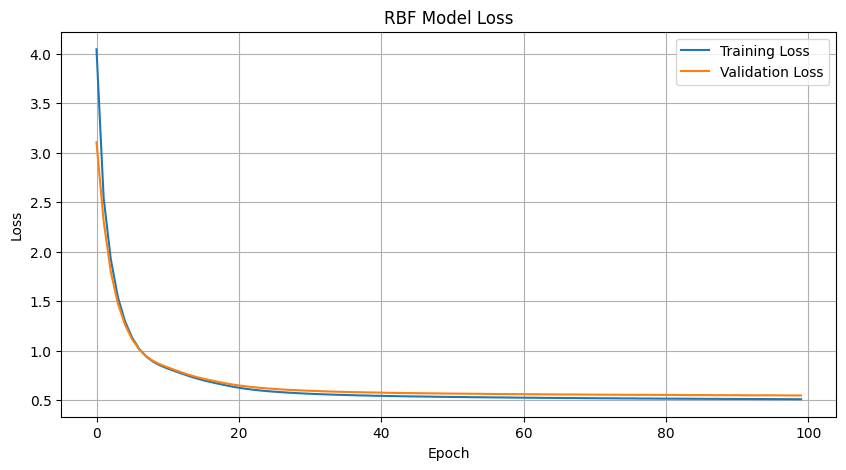

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('RBF Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid()
plt.show()


## Dense Layer

Define Model With Dense Layer

In [ ]:
# Define a simple neural network model using Dense layers
def create_dense_model(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=input_shape))  # Hidden layer with 64 neurons
    model.add(layers.Dense(1))  # Output layer for regression
    return model

# Create the model
input_shape = (X_train.shape[1],)
dense_model = create_dense_model(input_shape)

# Compile the model with MSE loss and Adam optimizer
dense_model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train Model

In [ ]:
# Train the model on the training data
history2 = dense_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5576 - val_loss: 0.6299
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5291 - val_loss: 0.4843
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4459 - val_loss: 0.4361
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4088 - val_loss: 0.4260
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3893 - val_loss: 0.4096
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3704 - val_loss: 0.4325
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3732 - val_loss: 0.3978
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3720 - val_loss: 0.4023
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3571 - val_loss: 0.3865
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3879 - val_loss: 0.3778
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3648 - val_loss: 0.3694
Epoch 12/100
413/413 ━━━━━━━━━━━━━━━━━━━━

Evaluate Model

In [ ]:
# Evaluate the model on test data and calculate loss
test_loss = dense_model.evaluate(X_test, y_test)

print(f'Test Loss (MSE): {test_loss}')

y_pred_dense = dense_model.predict(X_test)

# Calculate R-squared
r_squared_dense = r2_score(y_test, y_pred_dense)

print(f'R-squared (Dense Model): {r_squared_dense}')


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 0.2918
Test Loss (MSE): 0.2976958155632019
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step
R-squared (Dense Model): 0.7728222314887593


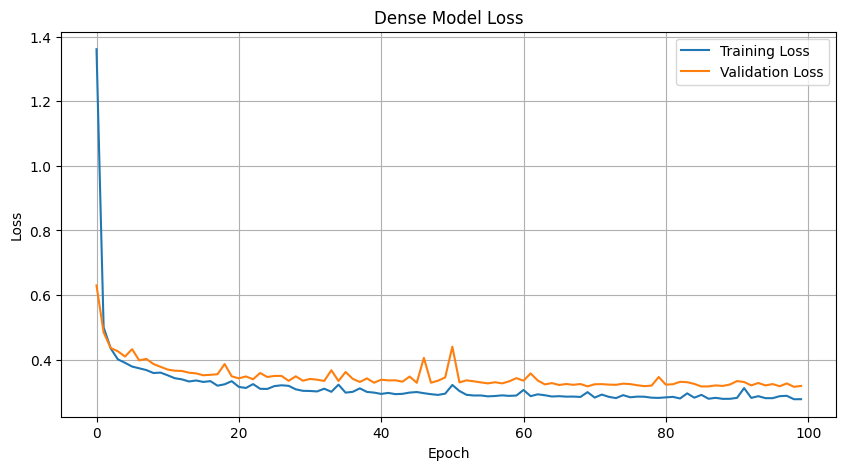

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Dense Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid()
plt.show()


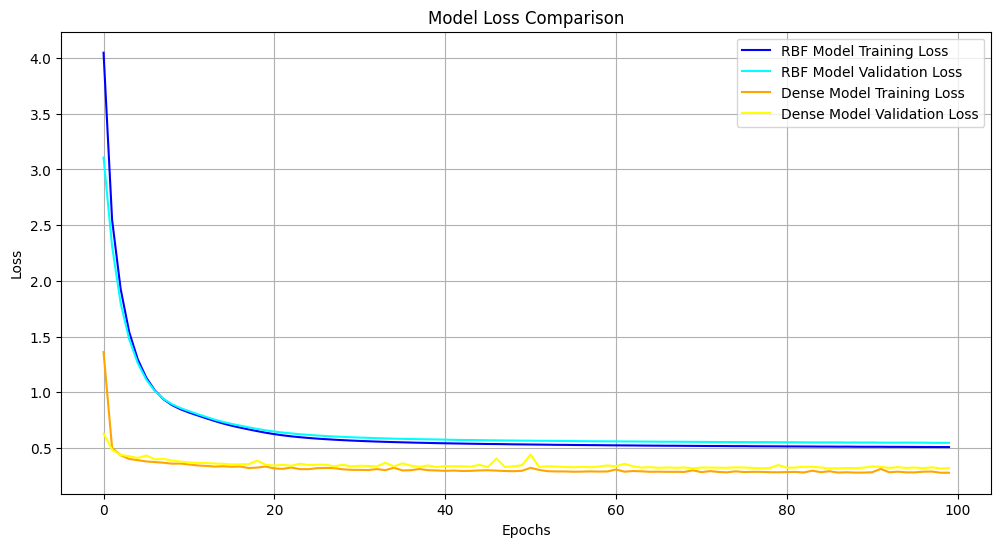

In [ ]:
# Extract loss values
loss_rbf = history.history['loss']
val_loss_rbf = history.history['val_loss']
loss_dense = history2.history['loss']
val_loss_dense = history2.history['val_loss']

# Create a new figure
plt.figure(figsize=(12, 6))

# Plot training loss for RBF model
plt.plot(loss_rbf, label='RBF Model Training Loss', color='blue')
plt.plot(val_loss_rbf, label='RBF Model Validation Loss', color='cyan')

# Plot training loss for Dense model
plt.plot(loss_dense, label='Dense Model Training Loss', color='orange')
plt.plot(val_loss_dense, label='Dense Model Validation Loss', color='yellow')

# Add titles and labels
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

# Show the plot
plt.show()
